Lets see what we can do with a wordmap (plot, noise reduction and possibly partitioning into morphemes?)

In [65]:
import text_utilities as tu # importing data
import numpy as np # arrays
import scipy.stats as stats # arithmetics
import matplotlib.pyplot as pp # plotting

In [66]:
# IMPORT DATA

wordset = tu.from_path('../data/experiment/verbs')

verb_dict = tu.count_syllables(wordset)
verb_dict.keys()
for i in range(1,9): # von mächtigster menge absteigend morpheme analysieren
    print(i, len(verb_dict[i]))

1 5010
2 27261
3 30123
4 14810
5 4455
6 1005
7 193
8 32


In [41]:
# CALCULATE RELATIVE FREQUENCY OF EACH LETTER AS FILTER FOR PLOT BELOW

allchars = ""
for sylnumber in verb_dict:
    for v in verb_dict[sylnumber]:
        allchars+=v


import collections as cl
n_maps = cl.Counter(list(allchars)).most_common()
n_maps

[('e', 129905),
 ('t', 77211),
 ('r', 68048),
 ('s', 50953),
 ('i', 48245),
 ('a', 40970),
 ('n', 40193),
 ('h', 36679),
 ('l', 32644),
 ('u', 29988),
 (' ', 28118),
 ('c', 26522),
 ('g', 24643),
 ('b', 22413),
 ('m', 19943),
 ('k', 16846),
 ('f', 16357),
 ('o', 14840),
 ('d', 14059),
 ('p', 12461),
 ('z', 12020),
 ('w', 8939),
 ('v', 8892),
 ('ü', 7642),
 ('ä', 6046),
 ('ö', 2628),
 ('ß', 1651),
 ('x', 559),
 ('q', 527),
 ('j', 490),
 ('y', 325),
 ('S', 38),
 ('R', 22),
 ('B', 17),
 ('G', 15),
 ('W', 10),
 ('L', 9),
 ('A', 9),
 ('D', 8),
 ('T', 7),
 ('-', 5),
 ('E', 5),
 ('H', 5),
 ('V', 4),
 ('è', 3),
 ("'", 3),
 ('á', 2),
 ('F', 2),
 ('M', 2),
 ('K', 2),
 ('P', 1),
 ('I', 1),
 ('`', 1)]

In [72]:
char_array = np.array(n_maps)
relfreq_array = stats.relfreq(char_array[:,1].astype(int), numbins=len(char_array))


0.9999999999999999

In [64]:
char_array[:,2] = relfreq_array
rf_array = np.insert(char_array, relfreq_array, axis=2)

IndexError: index 2 is out of bounds for axis 1 with size 2

Text(0, 0.5, 'frequency')

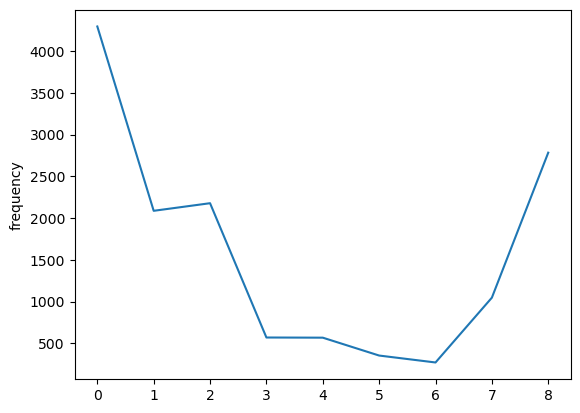

In [73]:
# PLOT FREQUENCY MAP FOR WORD
map_exmaple = [4295, 2088, 2179, 571, 569, 355, 272, 1048, 2784]  # wordmap für "scheissen"


arr = np.array(map_exmaple.copy())
stats.zscore(arr)

pp.plot(range(len(arr)), arr)
pp.ylabel('frequency')
